## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# _Project Title_


### Project participants:

* A. Daolin Sheng (ml192ds@leeds.ac.uk)
* B. Student (bstudent@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

The dataset comes from a Kaggle webpage([The Bread Basket](https://www.kaggle.com/mittalvasu95/the-bread-basket)),and it belongs to "The Bread Basket" a bakery located in Edinburgh. This a sample dataset about the online shopping. The dataset includes more than 9000 transactions of customers who orderes different items from this bakery online and has 20507 item records.

(around 300-400 words)
The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset has 20507 entries, over 9000 transactions, and 4 columns.

comes from 
transactionId, Item, data_time, period_day, weekday_weekend, date from 30-10-2016 to 09-04-2017

The dataset has transactions of customers who ordered different items from this bakery online and the time period of the data is from 26-01-11 to 27-12-03.
no Nan value.


## Project Aim and Objectives (5 marks)
(around 200-300 words)

1,

### Specific Objective(s)

* __Objective 1:__ _最受欢迎商品top(n)_
* __Objective 2:__ _交易趋势图_
* __Objective 3:__ _商品推荐_

## System Design (5 marks)


### Architecture

a simple architecture + 100-150words
  
### Processing Modules and Algorithms

1,date convert
2,item vector

# Program Code (15 marks)

#### _Brief Explanation of following code cell_

a simple explanation

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('./bread basket.csv')
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [62]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [80]:
# date convert
df['date_time'] = pd.to_datetime(df['date_time'])
# df.head()
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12), 
        ('Jan.','Feb.', 'Mar.', 'Apri.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'))
df['rhour'] = df['date_time'].dt.hour
df['rhour'] = df['rhour'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,0),
                                      ('00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', 
                                       '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', 
                                       '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00'))
df['weekday'] = df['date_time'].dt.weekday

df.head(10)df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,rhour,weekday
0,1,bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,Oct.,08-09,6
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,Oct.,09-10,6
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,Oct.,09-10,6
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,Oct.,09-10,6
4,3,jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,Oct.,09-10,6
5,3,cookies,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,Oct.,09-10,6
6,4,muffin,2016-10-30 10:08:00,morning,weekend,2016-10-30,10:08:00,Oct.,09-10,6
7,5,coffee,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,Oct.,09-10,6
8,5,pastry,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,Oct.,09-10,6
9,5,bread,2016-10-30 10:13:00,morning,weekend,2016-10-30,10:13:00,Oct.,09-10,6


In [65]:
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,rhour,weekday
0,1,bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,Oct.,08-09,6
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,Oct.,09-10,6
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,Oct.,09-10,6
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,Oct.,09-10,6
4,3,jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,Oct.,09-10,6


In [66]:
# count of uique cunstomers
df['Transaction'].nunique()

9465

#### _Comment on previous cell output (optional)_
a simple explantion

In [78]:
def most_top_n_items(n):
    x = df.Item.value_counts().head(n).index
    y = df.Item.value_counts().head(n).values
    
    return x, y

x, y = most_top_n_items(15)
print(x, y)

Index(['coffee', 'bread', 'tea', 'cake', 'pastry', 'sandwich', 'medialuna',
       'hot chocolate', 'cookies', 'brownie', 'farm house', 'muffin', 'juice',
       'alfajores', 'soup'],
      dtype='object') [5471 3325 1435 1025  856  771  616  590  540  379  374  370  369  369
  342]


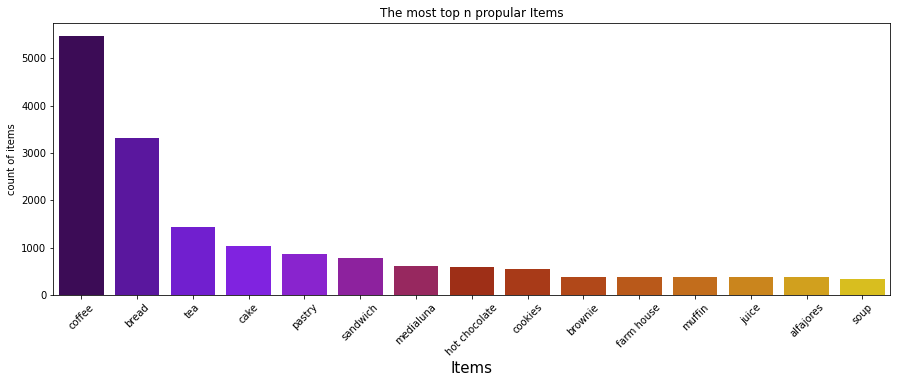

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x, y, palette='gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('count of items')
plt.title('The most top n propular Items', color = 'black')
plt.show()

# Project Outcome (10 + 10 marks)
(200-400 words explanation for each objective)

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

In [3]:
# plot

## Objective 2 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

In [4]:
# plot

## Objective 3 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

In [5]:
# plot

# Conclusion (5 marks)

(around 200-400 words)

### Acheivements


### Limitations


### Future Work


# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [56]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60